In [1]:
from datetime import datetime
from math import floor

import requests
import pandas as pd
import talib
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from data_tool import download_data

In [2]:
df = download_data("BTCUSDT", "BINANCE")

In [3]:
df

,gateway_name,symbol,exchange,datetime,interval,volume,turnover,open_interest,open_price,high_price,low_price,close_price,vt_symbol
datetime,,,,,,,,,,,,,
2025-08-01 00:00:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:00:00+08:00,Interval.MINUTE,21.42222,0,0,118306.18,118351.00,118306.18,118351.00,BTCUSDT.BINANCE
2025-08-01 00:01:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:01:00+08:00,Interval.MINUTE,38.27312,0,0,118350.99,118361.00,118312.13,118312.14,BTCUSDT.BINANCE
2025-08-01 00:02:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:02:00+08:00,Interval.MINUTE,5.95271,0,0,118312.14,118334.68,118312.13,118312.14,BTCUSDT.BINANCE
2025-08-01 00:03:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:03:00+08:00,Interval.MINUTE,16.05438,0,0,118312.14,118327.17,118274.74,118327.16,BTCUSDT.BINANCE
2025-08-01 00:04:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:04:00+08:00,Interval.MINUTE,6.29602,0,0,118327.16,118331.94,118303.49,118303.49,BTCUSDT.BINANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-09 23:56:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:56:00+08:00,Interval.MINUTE,1.89118,0,0,116831.13,116851.99,116831.12,116851.99,BTCUSDT.BINANCE
2025-08-09 23:57:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:57:00+08:00,Interval.MINUTE,1.44423,0,0,116851.98,116851.99,116836.71,116836.72,BTCUSDT.BINANCE
2025-08-09 23:58:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:58:00+08:00,Interval.MINUTE,4.01407,0,0,116836.72,116858.81,116836.71,116858.81,BTCUSDT.BINANCE


In [4]:
def load_data(symbol: str, exchange: str) -> pd.DataFrame:
    """加载数据"""
    filename = f"{exchange}_{symbol}.csv"

    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        df = download_data(symbol, exchange)
        df.to_csv(filename, index=False)
        return df

In [18]:
df = load_data("BTCUSDT", "BINANCE")

In [6]:
help(talib.MACD)

Help on function MACD in module talib._ta_lib:

MACD(real, fastperiod=-2147483648, slowperiod=-2147483648, signalperiod=-2147483648)
    MACD(ndarray real, int fastperiod=-0x80000000, int slowperiod=-0x80000000, int signalperiod=-0x80000000)

    MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])

    Moving Average Convergence/Divergence (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist



In [4]:
def calculate_indicator(df: pd.DataFrame, fast: int, slow: int, signal: int) -> None:
    """计算MACD指标"""
    df["macd"], df["signal"], df["hist"] = talib.MACD(df["close_price"], fast, slow, signal)
    df.dropna(inplace=True)

In [5]:
calculate_indicator(df, 12, 26, 9)

In [6]:
df

,gateway_name,symbol,exchange,datetime,interval,volume,turnover,open_interest,open_price,high_price,low_price,close_price,vt_symbol,macd,signal,hist
datetime,,,,,,,,,,,,,,,,
2025-08-01 00:33:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:33:00+08:00,Interval.MINUTE,24.64178,0,0,118780.22,118800.00,118723.49,118769.37,BTCUSDT.BINANCE,102.001270,68.906492,33.094778
2025-08-01 00:34:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:34:00+08:00,Interval.MINUTE,14.27126,0,0,118769.38,118814.41,118769.37,118807.23,BTCUSDT.BINANCE,111.772498,77.479693,34.292805
2025-08-01 00:35:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:35:00+08:00,Interval.MINUTE,20.09549,0,0,118807.22,118865.47,118807.22,118861.03,BTCUSDT.BINANCE,122.445996,86.472954,35.973042
2025-08-01 00:36:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:36:00+08:00,Interval.MINUTE,33.85484,0,0,118861.03,118874.54,118852.67,118874.54,BTCUSDT.BINANCE,130.490748,95.276513,35.214235
2025-08-01 00:37:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:37:00+08:00,Interval.MINUTE,20.77202,0,0,118874.54,118879.14,118837.06,118864.49,BTCUSDT.BINANCE,134.504832,103.122177,31.382656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-09 23:56:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:56:00+08:00,Interval.MINUTE,1.89118,0,0,116831.13,116851.99,116831.12,116851.99,BTCUSDT.BINANCE,-7.189290,-12.024373,4.835083
2025-08-09 23:57:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:57:00+08:00,Interval.MINUTE,1.44423,0,0,116851.98,116851.99,116836.71,116836.72,BTCUSDT.BINANCE,-6.858354,-10.991169,4.132815
2025-08-09 23:58:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:58:00+08:00,Interval.MINUTE,4.01407,0,0,116836.72,116858.81,116836.71,116858.81,BTCUSDT.BINANCE,-4.758751,-9.744685,4.985935


In [7]:
def run_backtesting(df: pd.DataFrame, capital: int) -> None:
    """执行回测"""
    # 计算仓位
    target = 0
    target_data = []
    print()
    for _, row in df.iterrows():
        if not target:
            if row.macd > row.signal:
                # 计算交易市值的仓位
                target = capital / row.close_price
        else:
            if row.macd <= row.signal:
                target = 0

        target_data.append(target)
    df["target"] = target_data
    df["pos"] = df["target"].shift(1)
    df["change"] = df["close_price"].diff()
    df["pnl"] = df["pos"] * df["change"]
    df["balance"] = df["pnl"].cumsum() + capital

In [8]:
run_backtesting(df, 1000000)
df

,gateway_name,symbol,exchange,datetime,interval,volume,turnover,open_interest,open_price,high_price,...,close_price,vt_symbol,macd,signal,hist,target,pos,change,pnl,balance
datetime,,,,,,,,,,,,,,,,,,,,,
2025-08-01 00:33:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:33:00+08:00,Interval.MINUTE,24.64178,0,0,118780.22,118800.00,...,118769.37,BTCUSDT.BINANCE,102.001270,68.906492,33.094778,8.419679,NaN,NaN,NaN,NaN
2025-08-01 00:34:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:34:00+08:00,Interval.MINUTE,14.27126,0,0,118769.38,118814.41,...,118807.23,BTCUSDT.BINANCE,111.772498,77.479693,34.292805,8.419679,8.419679,37.86,318.769056,1.000319e+06
2025-08-01 00:35:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:35:00+08:00,Interval.MINUTE,20.09549,0,0,118807.22,118865.47,...,118861.03,BTCUSDT.BINANCE,122.445996,86.472954,35.973042,8.419679,8.419679,53.80,452.978744,1.000772e+06
2025-08-01 00:36:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:36:00+08:00,Interval.MINUTE,33.85484,0,0,118861.03,118874.54,...,118874.54,BTCUSDT.BINANCE,130.490748,95.276513,35.214235,8.419679,8.419679,13.51,113.749867,1.000885e+06
2025-08-01 00:37:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-01 00:37:00+08:00,Interval.MINUTE,20.77202,0,0,118874.54,118879.14,...,118864.49,BTCUSDT.BINANCE,134.504832,103.122177,31.382656,8.419679,8.419679,-10.05,-84.617776,1.000801e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-09 23:56:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:56:00+08:00,Interval.MINUTE,1.89118,0,0,116831.13,116851.99,...,116851.99,BTCUSDT.BINANCE,-7.189290,-12.024373,4.835083,8.559454,8.559454,20.87,178.635808,1.016577e+06
2025-08-09 23:57:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:57:00+08:00,Interval.MINUTE,1.44423,0,0,116851.98,116851.99,...,116836.72,BTCUSDT.BINANCE,-6.858354,-10.991169,4.132815,8.559454,8.559454,-15.27,-130.702865,1.016446e+06
2025-08-09 23:58:00+08:00,BINANCE,BTCUSDT,Exchange.BINANCE,2025-08-09 23:58:00+08:00,Interval.MINUTE,4.01407,0,0,116836.72,116858.81,...,116858.81,BTCUSDT.BINANCE,-4.758751,-9.744685,4.985935,8.559454,8.559454,22.09,189.078342,1.016635e+06


In [9]:
def plot_chart(df: pd.DataFrame) -> None:
    """绘制资金曲线"""
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    balance_line = go.Scatter(y=df["balance"], x=df["datetime"], name="MACD Strategy")
    close_line = go.Scatter(y=df["close_price"], x=df["datetime"], name="Close Price")

    fig.add_trace(balance_line)
    fig.add_trace(close_line, secondary_y=True)
    fig.show()

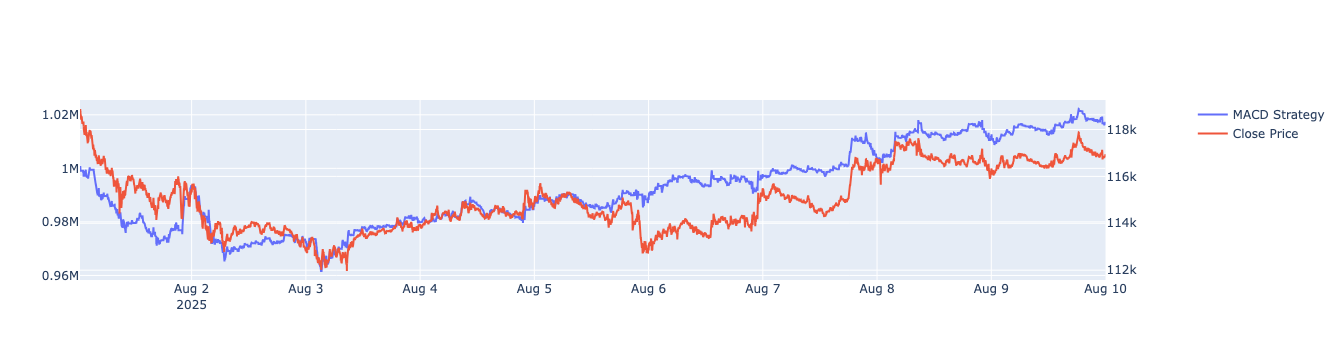

In [10]:
plot_chart(df)

In [11]:
df["close_price"].idxmax()

Timestamp('2025-08-01 00:36:00+0800', tz='Asia/Shanghai')

In [12]:
df["close_price"].idxmin()

Timestamp('2025-08-03 08:37:00+0800', tz='Asia/Shanghai')